In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.12.0


The IMDB dataset comes packaged with TensorFlow. It has already been preprocessed such that the reviews (sequences of words) have been converted to sequences of integers, where each integer represents a specific word in a dictionary.
(not good for learning :-p)

In [3]:
imdb_data = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb_data.load_data(num_words=10000)
#The argument num_words=10000 keeps the top 10,000 most frequently occurring words in the training data.

17465344/17464789 [==============================] - 15s 1us/step


In [4]:
train_data.shape

(25000,)

In [5]:
test_data.shape

(25000,)

Explore the data

For exploring a little bit, it is important to convert integers back to text

In [8]:
# A dictionary mapping words to an integer index
word_index = imdb_data.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 1s 1us/step


In [11]:
decode_review(train_data[20])

"<START> shown in australia as <UNK> this incredibly bad movie is so bad that you become <UNK> and have to watch it to the end just to see if it could get any worse and it does the storyline is so predictable it seems written by a high school <UNK> class the sets are pathetic but <UNK> better than the <UNK> and the acting is wooden br br the <UNK> <UNK> seems to have been stolen from the props <UNK> of <UNK> <UNK> there didn't seem to be a single original idea in the whole movie br br i found this movie to be so bad that i laughed most of the way through br br malcolm mcdowell should hang his head in shame he obviously needed the money"

In [12]:
train_labels[20]

0

#label 0 for negative review and label 1 for positive reviews.

Let's get with the second way as the first one is so computationally expensive.

Since the movie reviews must be the same length, we will use the pad_sequences function to standardize the lengths.

In [16]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [19]:
train_data.shape

(25000, 256)

In [36]:
vocab_size = 10000 #the input dimension will be equal to the vocabulary size

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [37]:
#Since this is a binary classification problem and the model outputs a probability 
#(a single-unit layer with a sigmoid activation), we'll use the binary_crossentropy loss function.
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [38]:
history = model.fit(train_data, train_labels,
                    epochs=50,
                    batch_size=512,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/50
20000/20000 [==============================] - 1s 41us/step - loss: 0.6900 - acc: 0.6602 - val_loss: 0.6848 - val_acc: 0.7064
Epoch 2/50
20000/20000 [==============================] - 1s 30us/step - loss: 0.6770 - acc: 0.7461 - val_loss: 0.6653 - val_acc: 0.7540
Epoch 3/50
20000/20000 [==============================] - 1s 28us/step - loss: 0.6490 - acc: 0.7750 - val_loss: 0.6284 - val_acc: 0.7796
Epoch 4/50
20000/20000 [==============================] - 1s 28us/step - loss: 0.6022 - acc: 0.8028 - val_loss: 0.5757 - val_acc: 0.8018
Epoch 5/50
20000/20000 [==============================] - 1s 32us/step - loss: 0.5415 - acc: 0.8290 - val_loss: 0.5175 - val_acc: 0.8138
Epoch 6/50
20000/20000 [==============================] - 1s 31us/step - loss: 0.4772 - acc: 0.8487 - val_loss: 0.4598 - val_acc: 0.8398
Epoch 7/50
20000/20000 [==============================] - 1s 33us/step - loss: 0.4202 - acc: 0.8658 - val_loss: 0.4154 - val_acc:

In [39]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 40us/step
[0.4266794769096375, 0.8638]


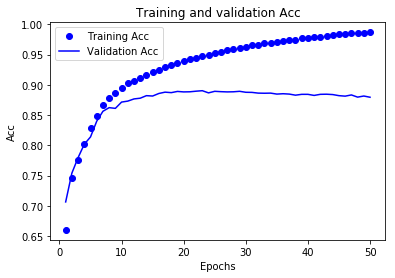

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()